In [1]:
# Import useful modules:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Audio
import scipy.signal as sg
import scipy.io
import librosa

# Import benchmarking modules:
from benchmark_demo.SignalBank import SignalBank
from benchmark_demo.utilstf import get_spectrogram, get_stft, get_round_window, get_gauss_window, sigmerge

# Import performance metrics
from benchmark_demo.perf_metrics import perceptual_kurt_ratio, activity, activity_2

In [2]:
%matplotlib widget

In [3]:
# Import a .mat file from Matlab where I saved the APS values and the subjective scores.
data_peass = scipy.io.loadmat('data_peass.mat')
APS = data_peass['APS']
scores_AIA = data_peass['scores_AIA']
b = np.resize(APS,(APS.size,))

In [4]:
# Import the files from the PEASS dataset and apply the measure.
# cuantiles = np.arange(0.01,0.21,0.01)

# for q in cuantiles:
#     DKPI = np.zeros((6,4))
#     for k,file_num in enumerate([3,5,6,7,8,9]):
        
#         #Import the target signal.
#         filename = 'exp0{}_target.wav'.format(file_num)
#         x_target, fs = librosa.load(filename, sr=48000)

#         # Compute the target activity
#         act = activity_2(x_target,fs=fs,q=q)
#         # act = np.invert(act)

#         # exp0{}_input.wav has all the influences summed to the target.
#         filename = 'exp0{}_input.wav'.format(file_num)
#         xi, fs = librosa.load(filename, sr=48000)

#         for j in range(4):
#             filename = 'exp0{}_test{}.wav'.format(file_num,j+5)
#             xo, fs = librosa.load(filename, sr=48000)  
            
#             DKPI[k,j] = perceptual_kurt_ratio(xi,xo,act=act,fs=48000)


#     a = np.resize(DKPI,(DKPI.size,))
#     c = np.corrcoef(a,b)
#     print(c[0,1])
#     # print(q)

In [9]:
DKPI = np.zeros((6,4))
for k,file_num in enumerate([3,5,6,7,8,9]):
    
    #Import the target signal.
    filename = 'exp0{}_target.wav'.format(file_num)
    x_target, fs = librosa.load(filename, sr=48000)

    # Compute the target activity
    act = activity_2(x_target,fs=fs,q=0.15)
    # act = np.invert(act)

    # exp0{}_input.wav has all the influences summed to the target.
    filename = 'exp0{}_input.wav'.format(file_num)
    xi, fs = librosa.load(filename, sr=48000)

    for j in range(4):
        filename = 'exp0{}_test{}.wav'.format(file_num,j+5)
        xo, fs = librosa.load(filename, sr=48000)  
        
        DKPI[k,j] = perceptual_kurt_ratio(xi,xo,act=act,fs=48000)

a = np.resize(DKPI,(DKPI.size,))
c = np.corrcoef(a,b)
print(c[0,1])

0.3674354151262327


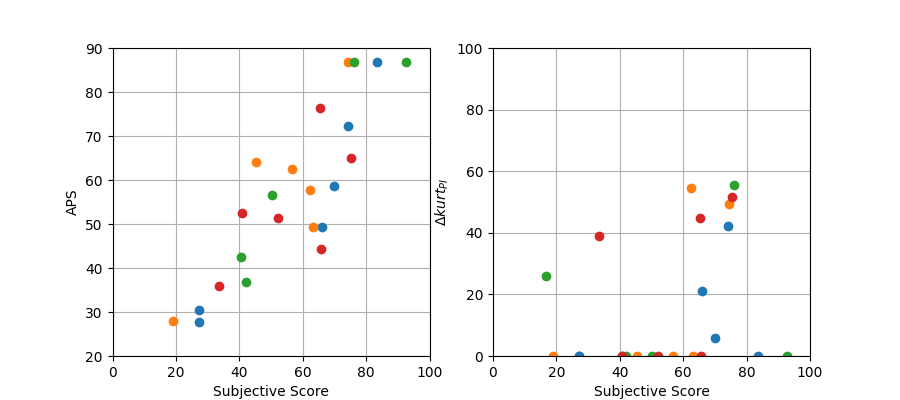

In [10]:
# Plot everything
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(9,4))
for i in range(4):
    axs[0].plot(scores_AIA[:,i],APS[:,i],'o')
axs[0].set_xlim([0,100])
axs[0].set_ylim([20,90])
axs[0].set_xlabel('Subjective Score')
axs[0].set_ylabel('APS')
axs[0].grid(True)
for i in range(4):
    axs[1].plot(scores_AIA[:,i],DKPI[:,i],'o')
axs[1].set_xlim([0,100])
axs[1].set_ylim([0,100])
axs[1].set_xlabel('Subjective Score')
axs[1].set_ylabel(r'$\Delta kurt_{PI}$')
axs[1].grid(True)
# print(c[0,1])
plt.show()
